In [6]:
import fix_yahoo_finance as yf  
 


In [7]:
stocks = ['ALL']
#download daily price data for each of the stocks in the portfolio
#data = web.DataReader(stocks,data_source='yahoo',start='01/01/2010')['Adj Close']
data = yf.download(stocks,'2018-01-15','2018-02-15')
print (data)

[*********************100%***********************]  1 of 1 downloaded
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-16  102.209999  102.730003  101.610001  102.129997  102.129997   
2018-01-17  102.510002  103.989998  102.279999  103.940002  103.940002   
2018-01-18  103.849998  104.330002  102.980003  104.000000  104.000000   
2018-01-19  104.419998  104.419998  103.129997  103.699997  103.699997   
2018-01-22  103.699997  104.430000  103.239998  104.430000  104.430000   
2018-01-23  104.220001  104.470001  100.300003  101.250000  101.250000   
2018-01-24  101.430000  101.529999   99.580002   99.870003   99.870003   
2018-01-25  100.389999  101.010002   99.519997  100.730003  100.730003   
2018-01-26  100.940002  101.620003   99.889999  100.529999  100.529999   
2018-01-29  100.250000  100.589996   98.000000   98.040001   98.040001   
2018-01-30   97.739998   99.300003   97.41

[*********************100%***********************]  40 of 40 downloaded


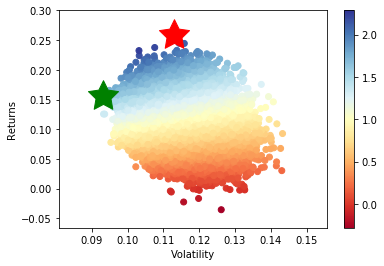

In [8]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
 
 
#list of stocks in portfolio
stocks = ['ALL',
 'MMC',
 'PGR',
 'MA',
 'AIG',
 'AON',
 'CME',
 'CFG',
 'RF',
 'PYPL',
 'ADBE',
 'NVDA',
 'FB',
 'CTXS',
 'XLNX',
 'NTAP',
 'ADSK',
 'LRCX',
 'AYI',
 'AMD',
 'WEC',
 'SCG',
 'CMS',
 'XEL',
 'NEE',
 'EXC',
 'PPL',
 'PCG',
 'NRG',
 'CPN',
 'VLO',
 'EQT',
 'WMB',
 'KMI',
 'CVX',
 'RIG',
 'NFX',
 'SLB',
 'ESV',
 'SWN']
 
#stocks = ['SPY', 'EEM', 'OIL', 'FXI', 'JNK', 'VCSH']
#download daily price data for each of the stocks in the portfolio
#data = web.DataReader(stocks,data_source='yahoo',start='01/01/2010')['Adj Close']
data = yf.download(stocks,'2017-02-15','2018-02-15')['Adj Close']
data.sort_index(inplace=True)
 
#convert daily stock prices into daily returns
returns = data.pct_change()
 
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
 
#set number of runs of random portfolio weights
num_portfolios = 50000
 
#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))
 
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(len(stocks)))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
 
#convert results array to Pandas DataFrame
columns = ['ret', 'stdev', 'sharpe'] + stocks
results_frame = pd.DataFrame(results.T,columns= columns)
 
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
 
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)
plt.show()

In [9]:
print(max_sharpe_port)

ret       0.257909
stdev     0.112832
sharpe    2.285778
ALL       0.041502
MMC       0.065417
PGR       0.036273
MA        0.028365
AIG       0.010539
AON       0.001694
CME       0.018948
CFG       0.052849
RF        0.063932
PYPL      0.026462
ADBE      0.036528
NVDA      0.011937
FB        0.007035
CTXS      0.004758
XLNX      0.003643
NTAP      0.003491
ADSK      0.030507
LRCX      0.001296
AYI       0.026862
AMD       0.053680
WEC       0.028131
SCG       0.058954
CMS       0.035406
XEL       0.013414
NEE       0.004870
EXC       0.048384
PPL       0.016026
PCG       0.029031
NRG       0.007532
CPN       0.068642
VLO       0.032453
EQT       0.011620
WMB       0.018964
KMI       0.002393
CVX       0.001907
RIG       0.010871
NFX       0.027668
SLB       0.038565
ESV       0.017933
SWN       0.001516
Name: 25936, dtype: float64
